In [22]:
import csv
import pandas as pd
import re
import nltk
import gensim
import random
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, ConfusionMatrixDisplay, roc_curve, auc, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jiang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jiang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
df = pd.read_csv('train.csv')
display(df.shape) #number or rows and columns
df.isnull().sum() #checks for null values
random.seed(28)
df = df.sample(10000)
sentiments = df['Sentiment'].value_counts() #value count of positive and negative sentiments
display(sentiments) 

test_df = pd.read_csv('test.csv')
sentiments = test_df['Sentiment'].value_counts()
test_df.isnull().sum()
test_df

(1048575, 3)

0    22860
1     7140
Name: Sentiment, dtype: int64

,Index,Sentiment,Text
0,0,1,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,1,1,Reading my kindle2... Love it... Lee childs i...
2,2,1,"Ok, first assesment of the #kindle2 ...it fuck..."
3,3,1,@kenburbary You'll love your Kindle2. I've had...
4,4,1,@mikefish Fair enough. But i have the Kindle2...
...,...,...,...
354,492,1,"After using LaTeX a lot, any other typeset mat..."
355,494,0,"On that note, I hate Word. I hate Pages. I hat..."
356,495,1,Ahhh... back in a *real* text editing environm...
357,496,0,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."


In [24]:
#preprocess the text, convert everything into lowercase and remove digital numbers and special characters

def textProc(text):
    stop_words = set(stopwords.words('english'))
    stemmer = SnowballStemmer('english')
    text = text.lower()                 #converts it all into lowercase
    text = re.sub('[0-9]', '', text)    #converts numbers to nothing

    text = re.sub(r"won\'t", "will not", text) #checks for contractions
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)

    text = re.sub(r"@\S+", "", text) # remove mentions
    text = re.sub("http[s]?\://\S+","",text) # remove links
    text = re.sub("[^a-z0-9<>]", ' ', text) #this will check for special characters

    words = [w for w in text.split()] #checks for stopwords
    stemmed = [stemmer.stem(w) for w in words] #does the stemming
    text = ' '.join(words) #joins everything together
    return text

df['Text'] = df['Text'].apply(lambda x:textProc(x))
test_df['Text'] = test_df['Text'].apply(lambda x:textProc(x))
display(test_df)

,Index,Sentiment,Text
0,0,1,i loooooooovvvvvveee my kindle not that the dx...
1,1,1,reading my kindle love it lee childs is good read
2,2,1,ok first assesment of the kindle it fucking rocks
3,3,1,you will love your kindle i have had mine for ...
4,4,1,fair enough but i have the kindle and i think ...
...,...,...,...
354,492,1,after using latex a lot any other typeset math...
355,494,0,on that note i hate word i hate pages i hate l...
356,495,1,ahhh back in a real text editing environment i...
357,496,0,trouble in iran i see hmm iran iran so far awa...


,aa,aaa,aaaa,aaaaaaaaaaaaaaaaaaaah,aaaaaaaaaaaaall,aaaaaaaaaaaah,aaaaaaaaaahhhhhhhhhhh,aaaaaaaah,aaaaaaages,aaaaaah,...,zumies,zumiez,zune,zwolle,zz,zzy,zzz,zzzz,zzzzzzz,zzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


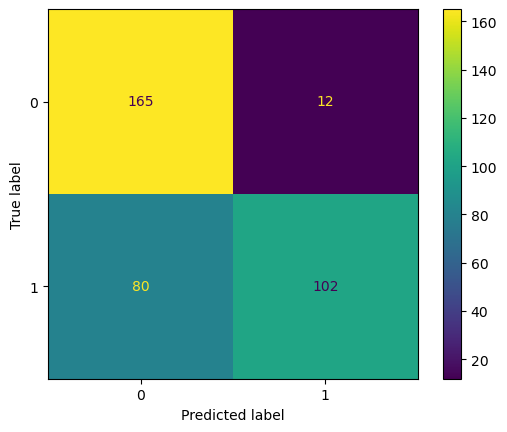

0.7437325905292479 0.8947368421052632 0.5604395604395604 0.6891891891891893
              precision    recall  f1-score   support

           0       0.93      0.67      0.78       245
           1       0.56      0.89      0.69       114

    accuracy                           0.74       359
   macro avg       0.75      0.78      0.74       359
weighted avg       0.81      0.74      0.75       359

0.8704910908300739


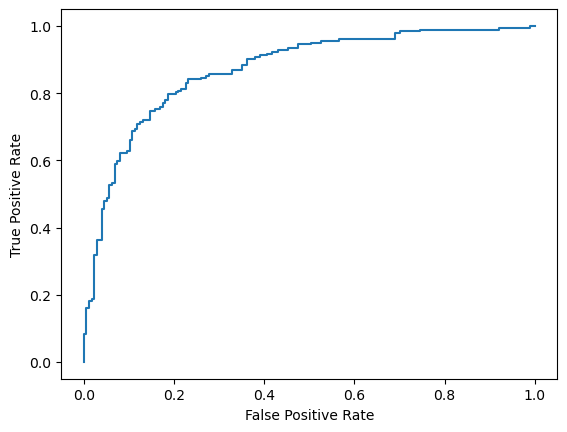

In [25]:
vectorizer = CountVectorizer() #count vectorizer, bagofwords method

#training dataframe
x_train = vectorizer.fit_transform(df['Text'])
y_train = df['Sentiment']

BOW_df = pd.DataFrame(x_train.toarray(), columns=vectorizer.get_feature_names_out())
display(BOW_df)



#testing dataframe
x_test = vectorizer.transform(test_df['Text'])
y_test = test_df['Sentiment']

#logistic regression
model = LogisticRegression(max_iter=1000000)
model.fit(x_train, y_train)
pred_model = model.predict(x_test)

#create confusion matrix
cml = confusion_matrix(y_test, pred_model)
disp = ConfusionMatrixDisplay(confusion_matrix=cml, display_labels=model.classes_)
disp.plot()
plt.show()

#calculate accuracy, precision, and recall
tn, fp, fn, tp = cml.ravel()
n = tp + tn + fp + fn
accuracy = (tp + tn) / n
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)
print(accuracy, precision, recall, f1)


#prints the classfication report
print(classification_report(pred_model, y_test))

pred_model = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, pred_model)
aucl = auc(fpr, tpr)
print(aucl)

#plots auc
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#uncomment to see the words in the bagofwords

# BOW_df = pd.DataFrame(x_train.toarray(), columns=vectorizer.get_feature_names_out())
# display(BOW_df)


In [26]:
#svm classification model
mod_svm = SVC(probability = True)
mod_svm.fit(x_train,y_train)
pred_s = mod_svm.predict(x_test)
cms = confusion_matrix(y_test, pred_s)
disp = ConfusionMatrixDisplay(confusion_matrix=cms, display_labels=mod_svm.classes_)
disp.plot()
plt.show()

#unraveling confusion matrix
tn, fp, fn, tp = cms.ravel()
n = tp + tn + fp + fn
accuracy = (tp + tn) / n
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)
print(accuracy, precision, recall, f1)

#plots auc
pred_s = mod_svm.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, pred_s)
aucs = auc(fpr, tpr)
print(aucs)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

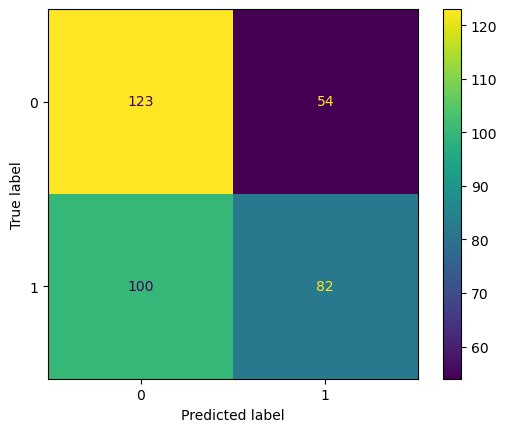

0.5710306406685237 0.6029411764705882 0.45054945054945056 0.5157232704402516
0.5727323523933694


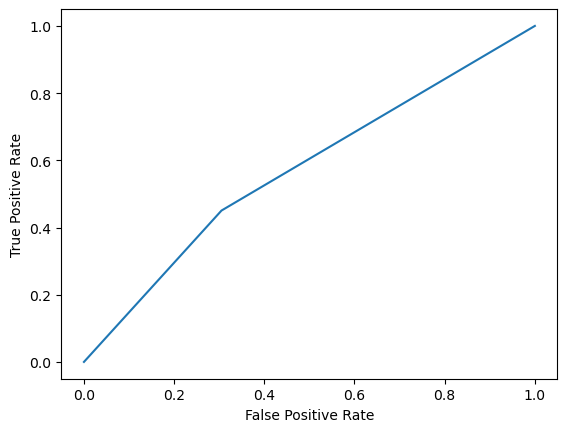

In [ ]:
#Naive Bayes, this one sucked
mod_naive = GaussianNB()
mod_naive.fit(x_train.toarray(), y_train)
pred_n = mod_naive.predict(x_test.toarray())
cmn = confusion_matrix(y_test, pred_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cmn, display_labels=mod_naive.classes_)
disp.plot()
plt.show()
tn, fp, fn, tp = cmn.ravel()
n = tp + tn + fp + fn
accuracy = (tp + tn) / n
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)
print(accuracy, precision, recall, f1)

pred_n = mod_naive.predict_proba(x_test.toarray())[::,1]
fpr, tpr, _ = roc_curve(y_test, pred_n)
aucn = auc(fpr, tpr)
print(aucn)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

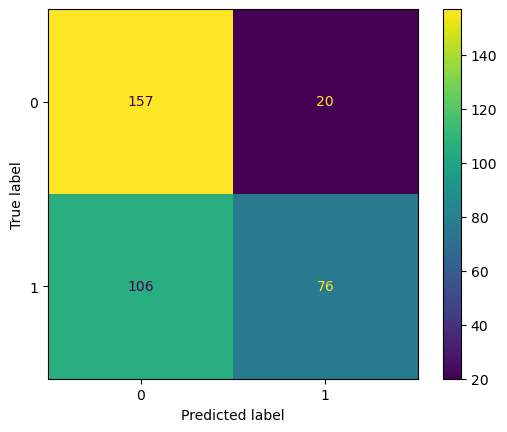

0.649025069637883 0.7916666666666666 0.4175824175824176 0.5467625899280576
0.7770379338175948


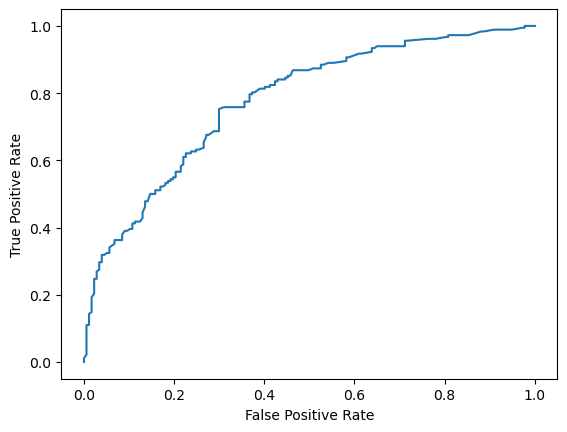

In [ ]:

mod_randFor = RandomForestClassifier()
mod_randFor.fit(x_train, y_train)
pred_r = mod_randFor.predict(x_test)
cmr = confusion_matrix(y_test, pred_r)
disp = ConfusionMatrixDisplay(confusion_matrix=cmr, display_labels=mod_randFor.classes_)
disp.plot()
plt.show()

tn, fp, fn, tp = cmr.ravel()
n = tp + tn + fp + fn
accuracy = (tp + tn) / n
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)
print(accuracy, precision, recall, f1)

pred_r = mod_randFor.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, pred_r)
aucr = auc(fpr, tpr)
print(aucr)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

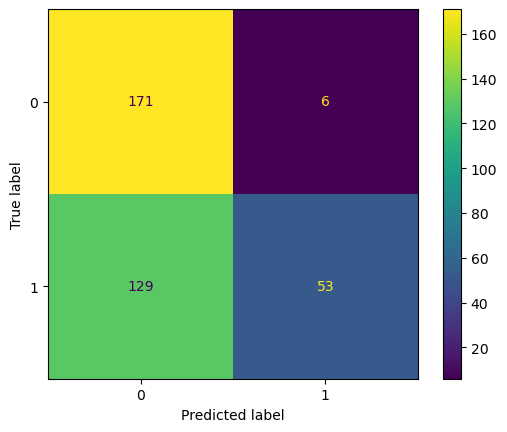

0.6239554317548747 0.8983050847457628 0.29120879120879123 0.43983402489626555
              precision    recall  f1-score   support

           0       0.97      0.57      0.72       300
           1       0.29      0.90      0.44        59

    accuracy                           0.62       359
   macro avg       0.63      0.73      0.58       359
weighted avg       0.86      0.62      0.67       359

0.8355994288197679


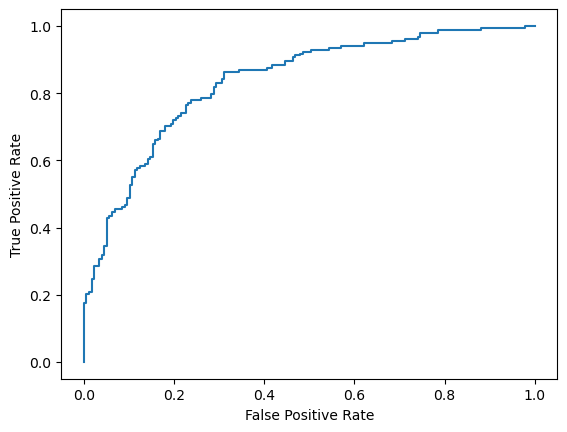

In [ ]:
vectorizer = TfidfVectorizer() #tfid method
tfidf = vectorizer.fit_transform(df['Text'])

#training set
x_train = vectorizer.fit_transform(df['Text'])
y_train = df['Sentiment']

#testing set
x_test = vectorizer.transform(test_df['Text'])
y_test = test_df['Sentiment']

#logistic regression
model = LogisticRegression(max_iter=1000000)
model.fit(x_train, y_train)
pred_model = model.predict(x_test)
cml = confusion_matrix(y_test, pred_model)
disp = ConfusionMatrixDisplay(confusion_matrix=cml, display_labels=model.classes_)
disp.plot()
plt.show()

tn, fp, fn, tp = cml.ravel()
n = tp + tn + fp + fn
accuracy = (tp + tn) / n
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)
print(accuracy, precision, recall, f1)

print(classification_report(pred_model, y_test))

pred_model = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, pred_model)
aucl = auc(fpr, tpr)
print(aucl)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
#svm classification model
mod_svm = SVC(probability = True)
mod_svm.fit(x_train,y_train)
pred_s = mod_svm.predict(x_test)
cms = confusion_matrix(y_test, pred_s)
disp = ConfusionMatrixDisplay(confusion_matrix=cms, display_labels=mod_svm.classes_)
disp.plot()
plt.show()

#unraveling confusion matrix
tn, fp, fn, tp = cms.ravel()
n = tp + tn + fp + fn
accuracy = (tp + tn) / n
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)
print(accuracy, precision, recall, f1)

#plots auc
pred_s = mod_svm.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, pred_s)
aucs = auc(fpr, tpr)
print(aucs)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

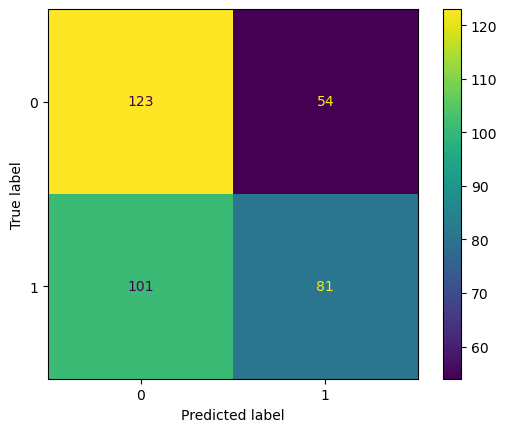

0.5682451253481894 0.6 0.44505494505494503 0.5110410094637224
0.5699850996461165


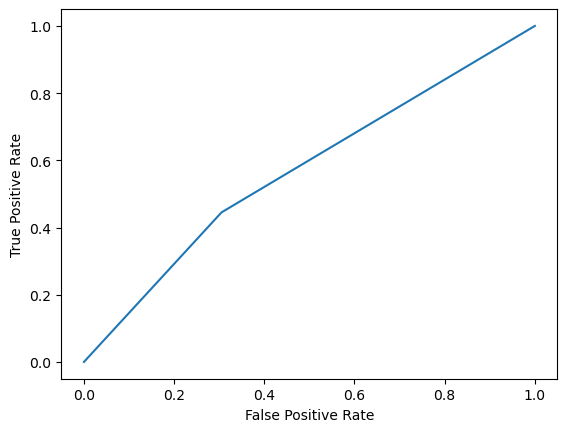

In [ ]:
mod_naive = GaussianNB()
mod_naive.fit(x_train.toarray(), y_train)
pred_n = mod_naive.predict(x_test.toarray())
cmn = confusion_matrix(y_test, pred_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cmn, display_labels=mod_naive.classes_)
disp.plot()
plt.show()
tn, fp, fn, tp = cmn.ravel()
n = tp + tn + fp + fn
accuracy = (tp + tn) / n
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)
print(accuracy, precision, recall, f1)

pred_n = mod_naive.predict_proba(x_test.toarray())[::,1]
fpr, tpr, _ = roc_curve(y_test, pred_n)
aucn = auc(fpr, tpr)
print(aucn)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

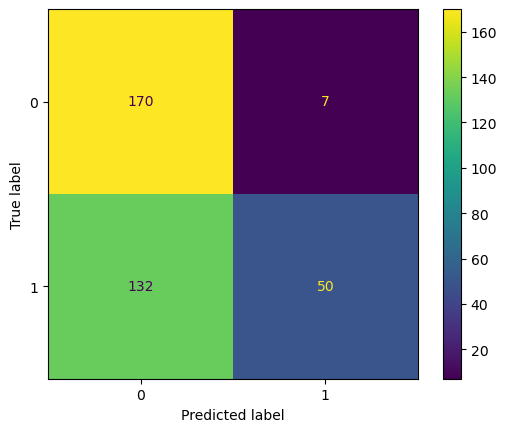

Bag of Words - Random Forest
               precision    recall  f1-score   support

           0       0.56      0.96      0.71       177
           1       0.88      0.27      0.42       182

    accuracy                           0.61       359
   macro avg       0.72      0.62      0.56       359
weighted avg       0.72      0.61      0.56       359



In [ ]:

mod_randFor = RandomForestClassifier()
mod_randFor.fit(x_train, y_train)
pred_r = mod_randFor.predict(x_test)
cmr = confusion_matrix(y_test, pred_r)
disp = ConfusionMatrixDisplay(confusion_matrix=cmr, display_labels=mod_randFor.classes_)
disp.plot()
plt.show()

tn, fp, fn, tp = cmr.ravel()
n = tp + tn + fp + fn
accuracy = (tp + tn) / n
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)
print(accuracy, precision, recall, f1)

pred_r = mod_randFor.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, pred_r)
aucr = auc(fpr, tpr)
print(aucr)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
words = [nltk.word_tokenize(text) for text in df['Text']]
model1 = gensim.models.Word2Vec(words, min_count = 1)